Dataset -
https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

Installing PYCARET

In [ ]:
!pip install --pre pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 102.7 MB/s

#Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [ ]:
from pycaret.classification import *

#Loading the dataset

In [ ]:
!wget https://github.com/utkarsh-aryan/Datasets-for-projects/raw/main/transaction_dataset.csv

--2023-11-05 13:35:56--  https://github.com/utkarsh-aryan/Datasets-for-projects/raw/main/transaction_dataset.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/utkarsh-aryan/Datasets-for-projects/main/transaction_dataset.csv [following]
--2023-11-05 13:35:57--  https://raw.githubusercontent.com/utkarsh-aryan/Datasets-for-projects/main/transaction_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2880761 (2.7M) [text/plain]
Saving to: ‘transaction_dataset.csv’

transaction_dataset 100%[===================>]   2.75M  --.-KB/s    in 0.1s    

2023-11-05 13:35:57 (27.3 MB/s) - ‘transactio

#Data Pre-processing

In [ ]:
df = pd.read_csv("transaction_dataset.csv", delimiter=",")

In [ ]:
df.sample(3)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
1541,1541,1542,0x2780b9476964a2a120a2b2b5169c916f1a48e183,0,0.00,1553.29,226780.37,0,146,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,None,DATAcoin
4688,4688,1756,0x7cb550b0a71c5339a33e99bdb080680413b67728,0,10.96,1016.71,725483.53,701,706,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4372,4372,1440,0x73fc3b67aee35876c5998f0a27d0c2b2a493d0b2,0,0.00,1684.81,291471.38,0,173,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,None,DATAcoin


In [ ]:
#drop 3  frist columns
df = df.iloc[:,3:]

In [ ]:
df.shape

(9841, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [ ]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


using pycaret

In [ ]:
setup(df, target='FLAG', session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 48)"
4,Transformed data shape,"(9841, 48)"
5,Transformed train set shape,"(6888, 48)"
6,Transformed test set shape,"(2953, 48)"
7,Numeric features,45
8,Categorical features,2
9,Rows with missing values,8.7%


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9936,0.9981,0.9804,0.9907,0.9855,0.9814,0.9814,0.7350
lightgbm,Light Gradient Boosting Machine,0.9936,0.9993,0.9764,0.9947,0.9854,0.9813,0.9814,1.9770
et,Extra Trees Classifier,0.9929,0.9996,0.9679,1.0000,0.9836,0.9791,0.9793,0.6590
xgboost,Extreme Gradient Boosting,0.9925,0.9994,0.9731,0.9927,0.9828,0.9779,0.9781,0.3150
rf,Random Forest Classifier,0.9917,0.9990,0.9672,0.9953,0.9810,0.9757,0.9759,1.4130
gbc,Gradient Boosting Classifier,0.9916,0.9988,0.9725,0.9894,0.9808,0.9754,0.9755,3.2010
dt,Decision Tree Classifier,0.9868,0.9800,0.9679,0.9724,0.9701,0.9616,0.9616,0.4320
knn,K Neighbors Classifier,0.9148,0.9335,0.7692,0.8335,0.7998,0.7458,0.7470,0.3500
ridge,Ridge Classifier,0.8988,0.0000,0.5476,0.9914,0.7049,0.6500,0.6921,0.2470
lda,Linear Discriminant Analysis,0.8987,0.9571,0.5476,0.9902,0.7046,0.6496,0.6915,0.2660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=85)

EDA & VISUALIZATION & DATA CLEANING

In [ ]:
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

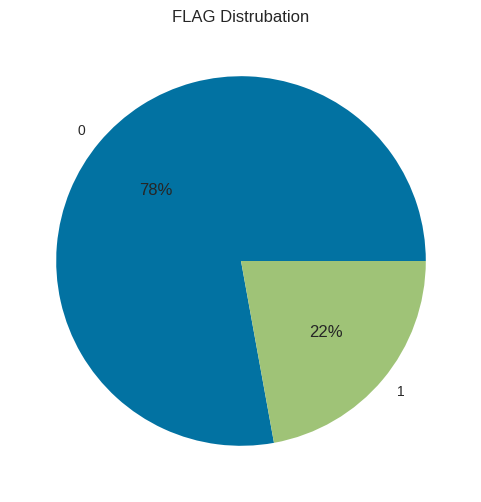

In [ ]:
#distubation of FALG (for check balancing or imbalancing data)
plt.figure(figsize=(6,6))
plt.pie(df['FLAG'].value_counts(),labels=df['FLAG'].value_counts().index, autopct='%.0f%%')
plt.title('FLAG Distrubation')
plt.show()


In [ ]:
# drop categorical features
categories = df.select_dtypes('O').columns.astype('category')
df.drop(df[categories], axis=1, inplace=True)# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [ ]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [ ]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

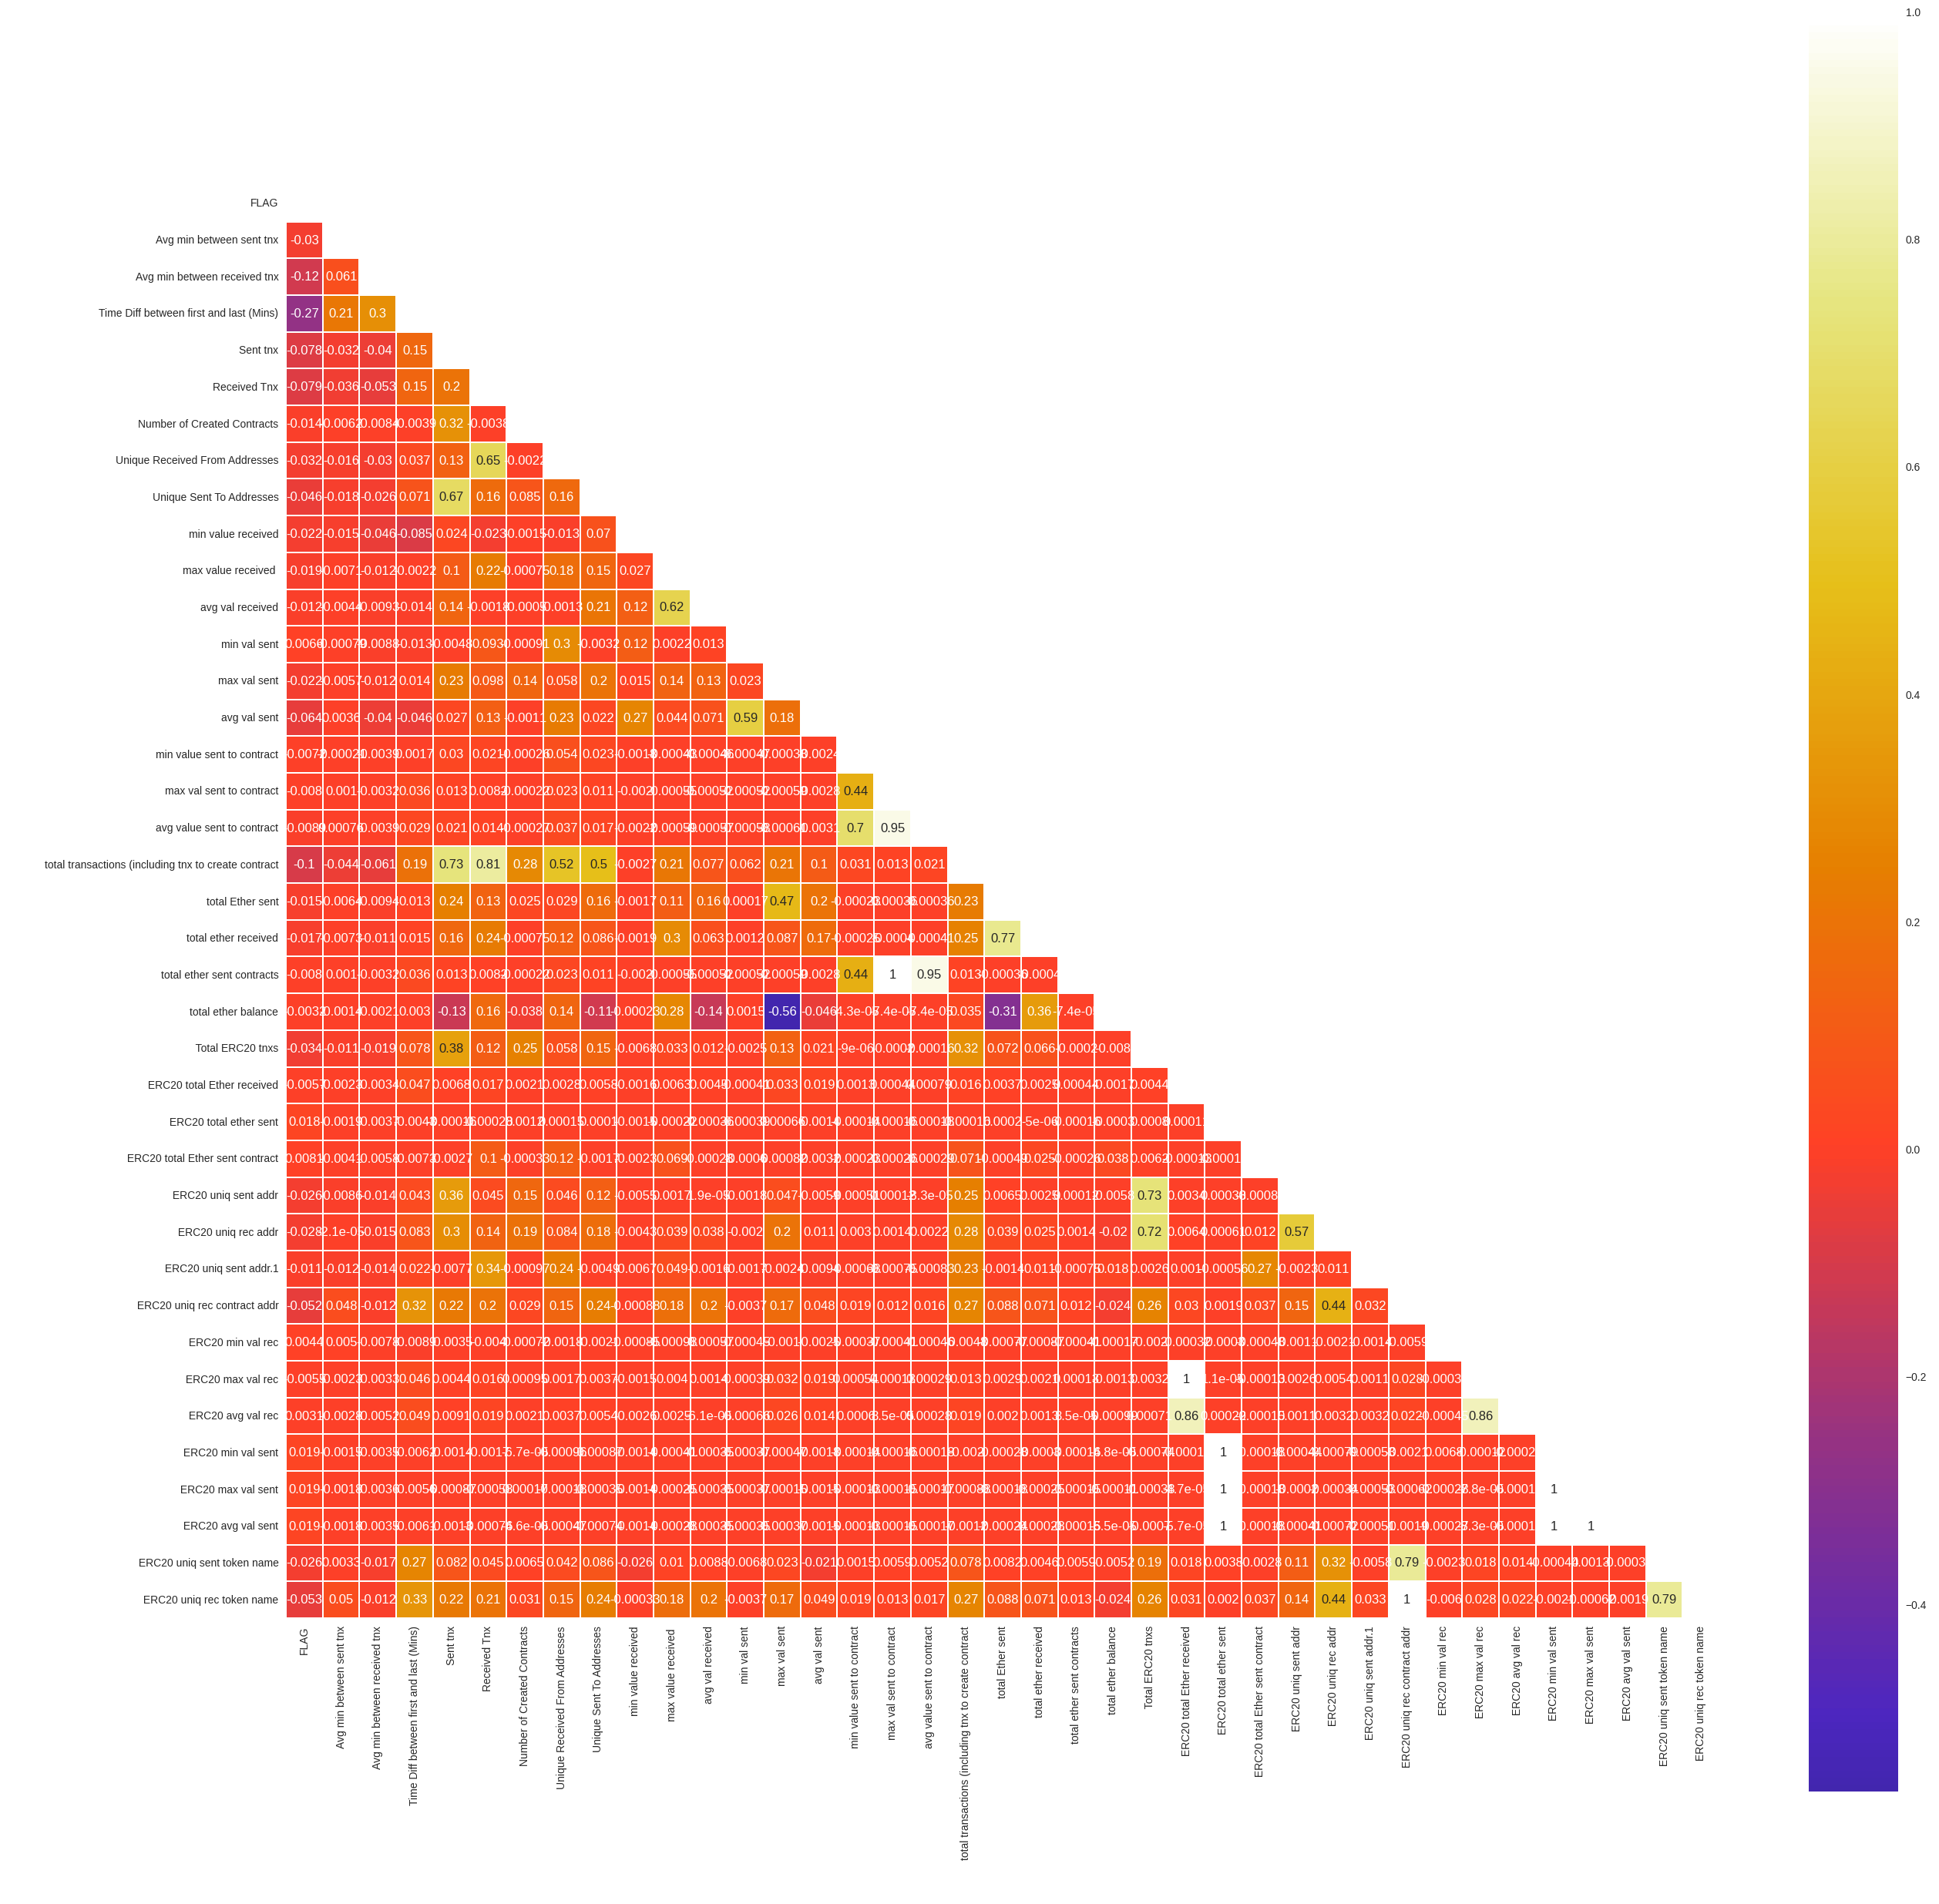

In [ ]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [ ]:
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts',
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'avg value sent to contract',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

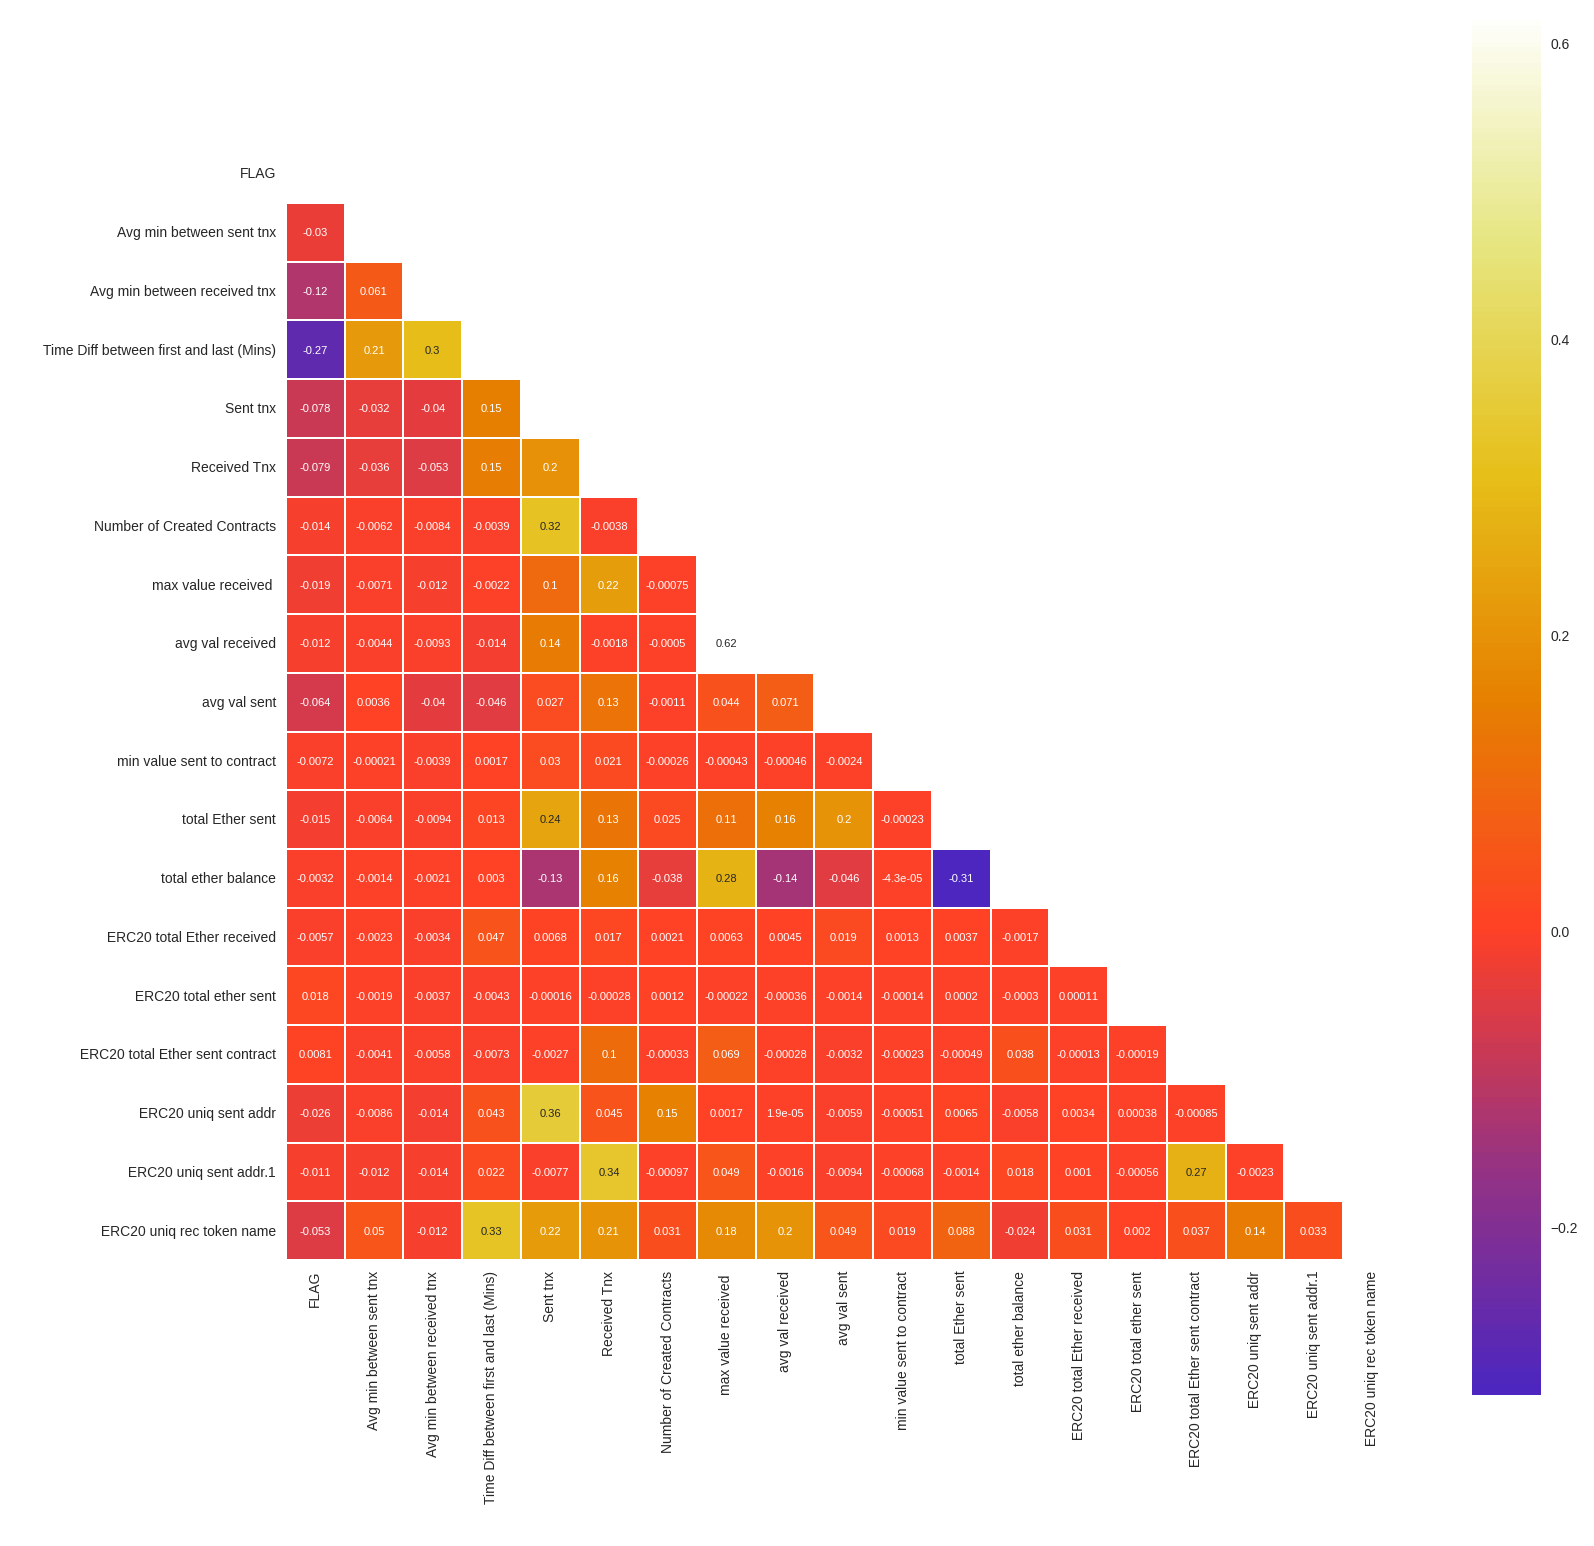

In [ ]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

In [ ]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


In [ ]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


In [ ]:
df.shape

(9841, 17)

Data Preparation

In [ ]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [ ]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [ ]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)

In [ ]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.031784,-0.130116,-0.170156,-0.026374,-0.008354,-0.051039,-0.011875,-0.019294,0.125987,1.868394
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.043658,-0.183336,-0.209762,-0.028905,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.041094,-0.182633,-0.208458,-0.027951,-0.007905,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.043563,-0.182076,-0.209762,-0.028905,-0.007917,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.038450,-0.055912,0.027769,-0.028650,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.238842,-0.320304,-0.672906,-0.152022,-0.174717,-0.025638,-0.043444,-0.179100,-0.193976,-0.028896,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
7868,-0.160852,-0.250448,0.336370,-0.140310,-0.024143,-0.025638,-0.042296,-0.179728,-0.110226,-0.028370,-0.007921,-0.052381,-0.012140,-0.019294,-0.058886,0.027931
7869,-0.238842,-0.339707,-0.675610,-0.152022,-0.175749,-0.025638,-0.043642,-0.182894,-0.208949,-0.028904,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
7870,0.116065,0.012046,-0.061022,-0.140310,-0.161310,-0.025638,0.158200,0.187543,0.827274,-0.023335,-0.007921,-0.052386,-0.012140,-0.019294,-0.058886,-0.033418


In [ ]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

Shape of the training before SMOTE: ((7872, 16), (7872,))


In [ ]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training after SMOTE: ((12230, 16), (12230,))


In [ ]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \ \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 \ 	Fauds: 6116


Build Model

In [ ]:
#Logistic Regression
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = LR.predict(sc_test)

In [ ]:
print(y_test.shape)
y_test.value_counts()

(1969,)


0    1547
1     422
Name: FLAG, dtype: int64

              precision    recall  f1-score   support

           0       0.94      0.54      0.69      1547
           1       0.34      0.87      0.49       422

    accuracy                           0.61      1969
   macro avg       0.64      0.71      0.59      1969
weighted avg       0.81      0.61      0.64      1969



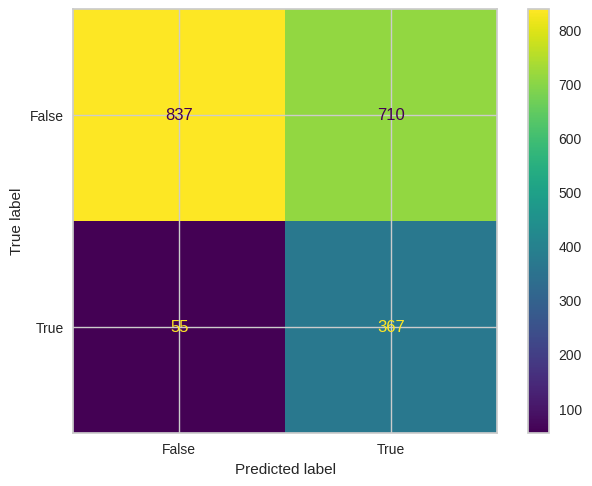

In [ ]:
print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969



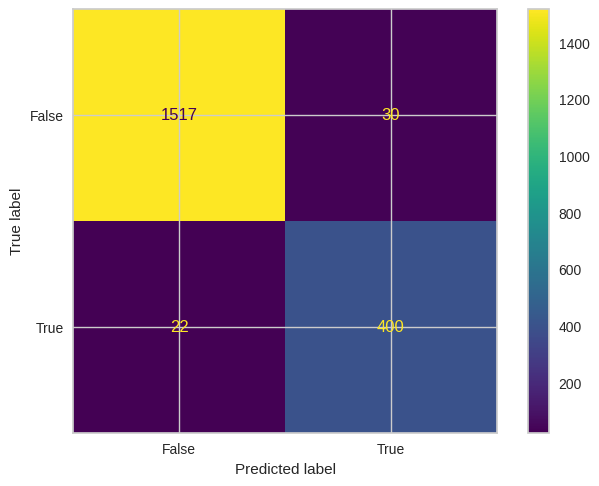

In [ ]:
#RandomForest Classifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = RF.predict(sc_test)

print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1547
           1       0.84      0.93      0.89       422

    accuracy                           0.95      1969
   macro avg       0.91      0.94      0.93      1969
weighted avg       0.95      0.95      0.95      1969



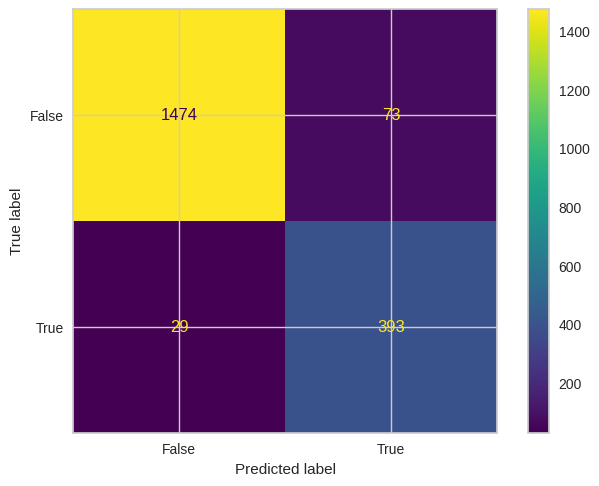

In [ ]:
#AdaBoost Classifier
ADA = AdaBoostClassifier(random_state=42)
ADA.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = ADA.predict(sc_test)

print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1547
           1       0.92      0.93      0.92       422

    accuracy                           0.97      1969
   macro avg       0.95      0.95      0.95      1969
weighted avg       0.97      0.97      0.97      1969



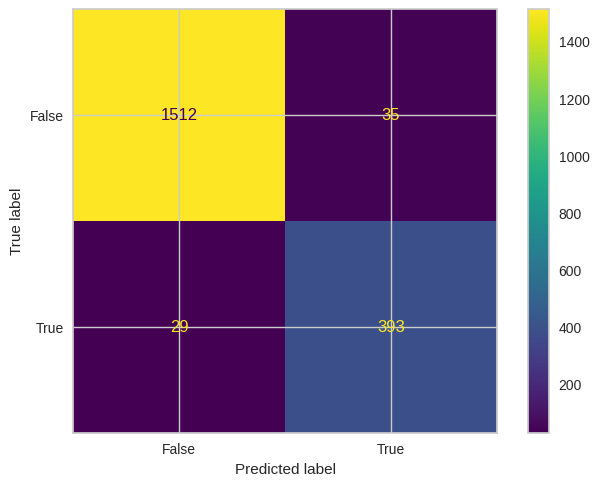

In [ ]:
#ExtraTrees Classifier
EXTree = ExtraTreesClassifier(random_state=42)
EXTree.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = EXTree.predict(sc_test)

print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1547
           1       0.87      0.95      0.91       422

    accuracy                           0.96      1969
   macro avg       0.93      0.96      0.94      1969
weighted avg       0.96      0.96      0.96      1969



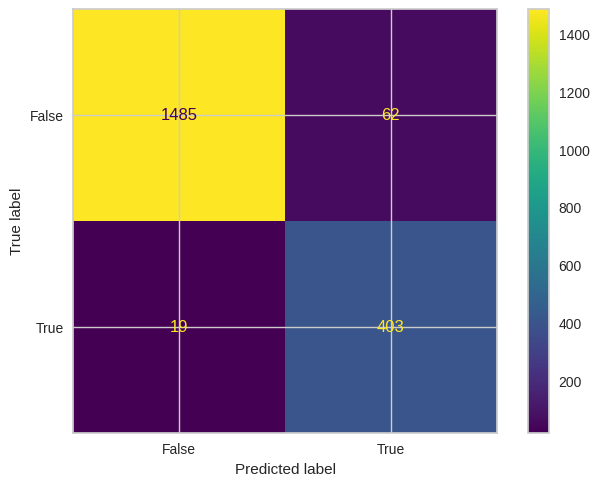

In [ ]:
#GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=42)
grad.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = grad.predict(sc_test)

print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.96      1969
weighted avg       0.98      0.98      0.98      1969



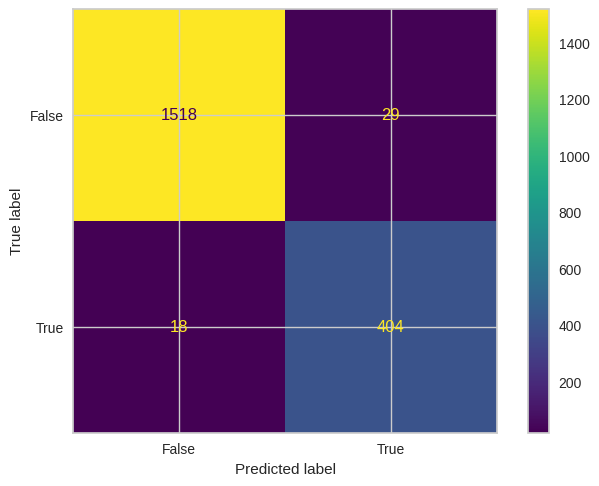

In [ ]:
#XGB Classifier
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = xgb_c.predict(sc_test)

print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

HyperParameters for XGB Classifier

In [ ]:
params_grid = {'learning_rate':[0.1, 0.5, 0.7],
              'n_estimators':[100,200],
              'subsample':[0.5, 0.9],
               'max_depth':[4,5],
               'colsample_bytree':[0.3,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Best recall obtained by the best params: 0.9859276552956153


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969



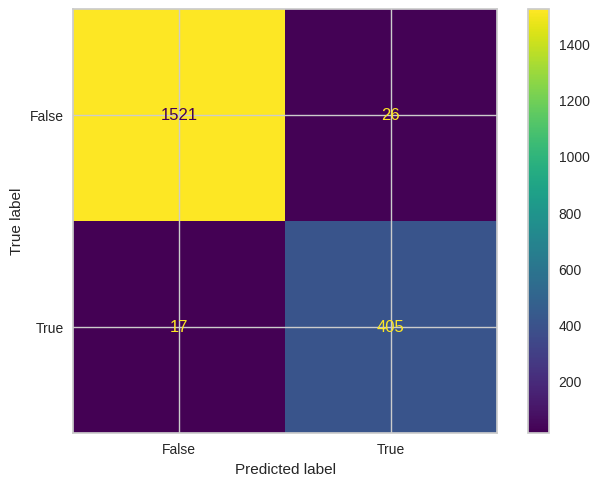

In [ ]:
preds_best_xgb = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_xgb))
confusion_matrix_ = confusion_matrix(y_test, preds_best_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

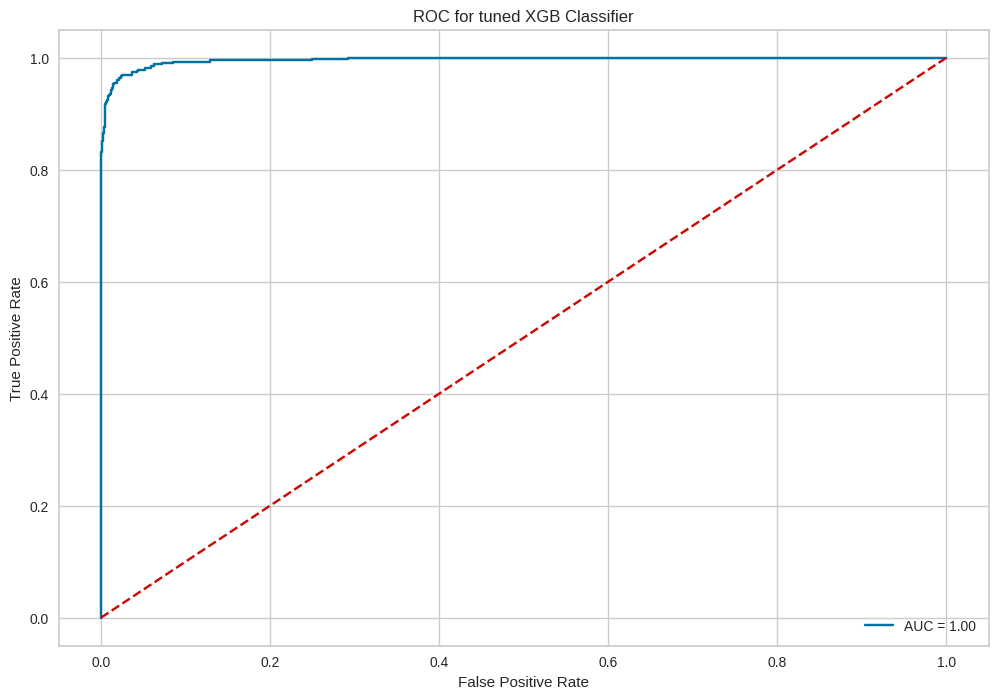

In [ ]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(sc_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Save the model for further use
pickle_out = open('XGB_FRAUD.pickle', 'wb')
pickle.dump(xgb_c, pickle_out)
pickle_out.close()